In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The data has 614 rows × 13 columns

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.shape

(614, 13)

data has 614 rows × 13 columns out of which 1 is target and remaining are independent variable

In [6]:
data.columns
data.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [7]:
#checking the null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There area null values in the data frame

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:>

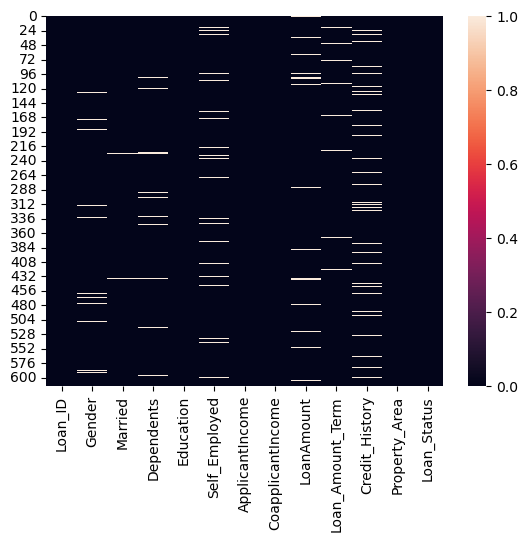

In [9]:
import seaborn as sns
sns.heatmap(data.isnull())

As there is no single colour so there  null values as seen above also

In [12]:
# to check unique vqlues
data['Loan_Status'].unique()


array(['Y', 'N'], dtype=object)

.The out put has binary classification problem. as the nuber of unique outcome is 2 
the ration of unique values to total number of 614 rows is 2/614=.003257.

In [13]:
data['Loan_Status'].nunique()# number of unique values


2

In [14]:
data['Property_Area'].nunique()# number of unique values


3

In [15]:
data['Gender'].nunique()# number of unique values

2

In [16]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")
    

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253

In [17]:
data["Loan_Status"].unique()
data.shape[0]


614

In [18]:
data.loc[data["Loan_Status"]==" "]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [4]:
# Replace null values with mean
data1 = data.fillna(data.mean())

# Display the DataFrame with filled values
print(data1)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162           

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7500\2526040416.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data1 = data.fillna(data.mean())


In [62]:
data1.drop('Loan_ID', axis=1, inplace=True)

<AxesSubplot:>

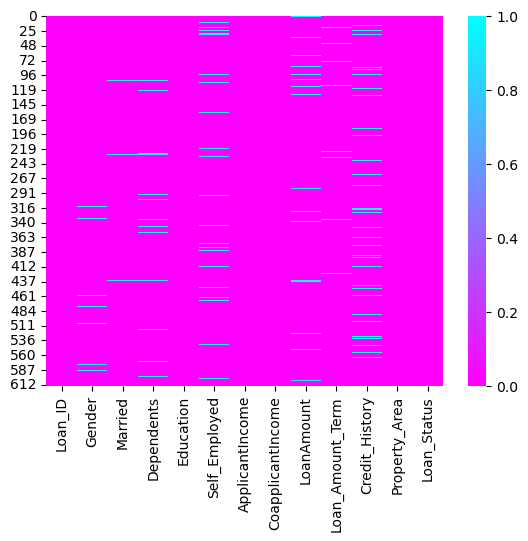

In [64]:
sns.heatmap(data.isnull(),cmap="cool_r")

In [ ]:
there are still empty spaces

In [11]:
import numpy as np
data1["Gender"]=data1["Gender"].replace(" ",np.nan)
data1["Dependents"]=data1["Dependents"].replace(" ",np.nan)
data1["Self_Employed"]=data1["Self_Employed"].replace(" ",np.nan)

<AxesSubplot:>

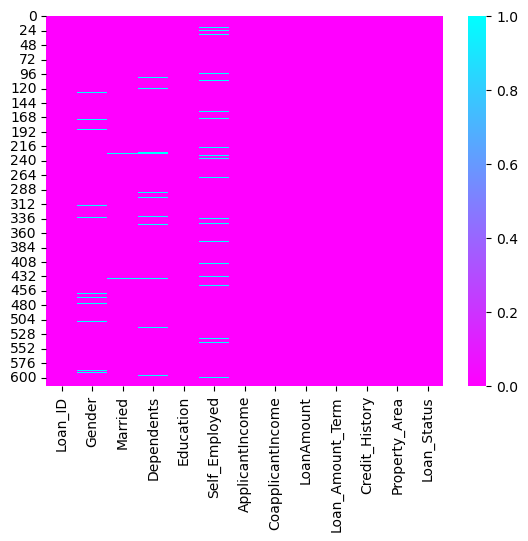

In [23]:
sns.heatmap(data1.isnull(),cmap="cool_r")

In [12]:
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000



mean is more than the meadian in applicant income, loan amount right skewed. outliners are present in 
ApplicantIncome	CoapplicantIncome	LoanAmount, Null values are present as the count is not equal

In [13]:
#checking the unique values in each column
data1.nunique().to_frame("No.of unique value")

,No.of unique value
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11


In [22]:
numerical_columns = data.select_dtypes(include="number").columns
print(numerical_columns)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [23]:
categorical_colm = []
for i in data.columns:
    if data[i].dtype == "object":
        categorical_colm.append(i)

print("Categorical columns:", categorical_colm)


Categorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


 data visualization

Y    422
N    192
Name: Loan_Status, dtype: int64


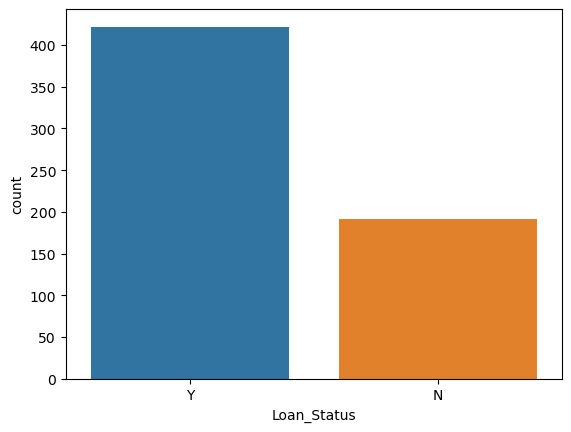

In [24]:

import seaborn as sns

if data["Loan_Status"].notnull().any():
    sns.countplot(x='Loan_Status', data=data)
    print(data["Loan_Status"].value_counts())
else:
    print("The 'Loan_Status' column does not contain any non-null values.")



C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

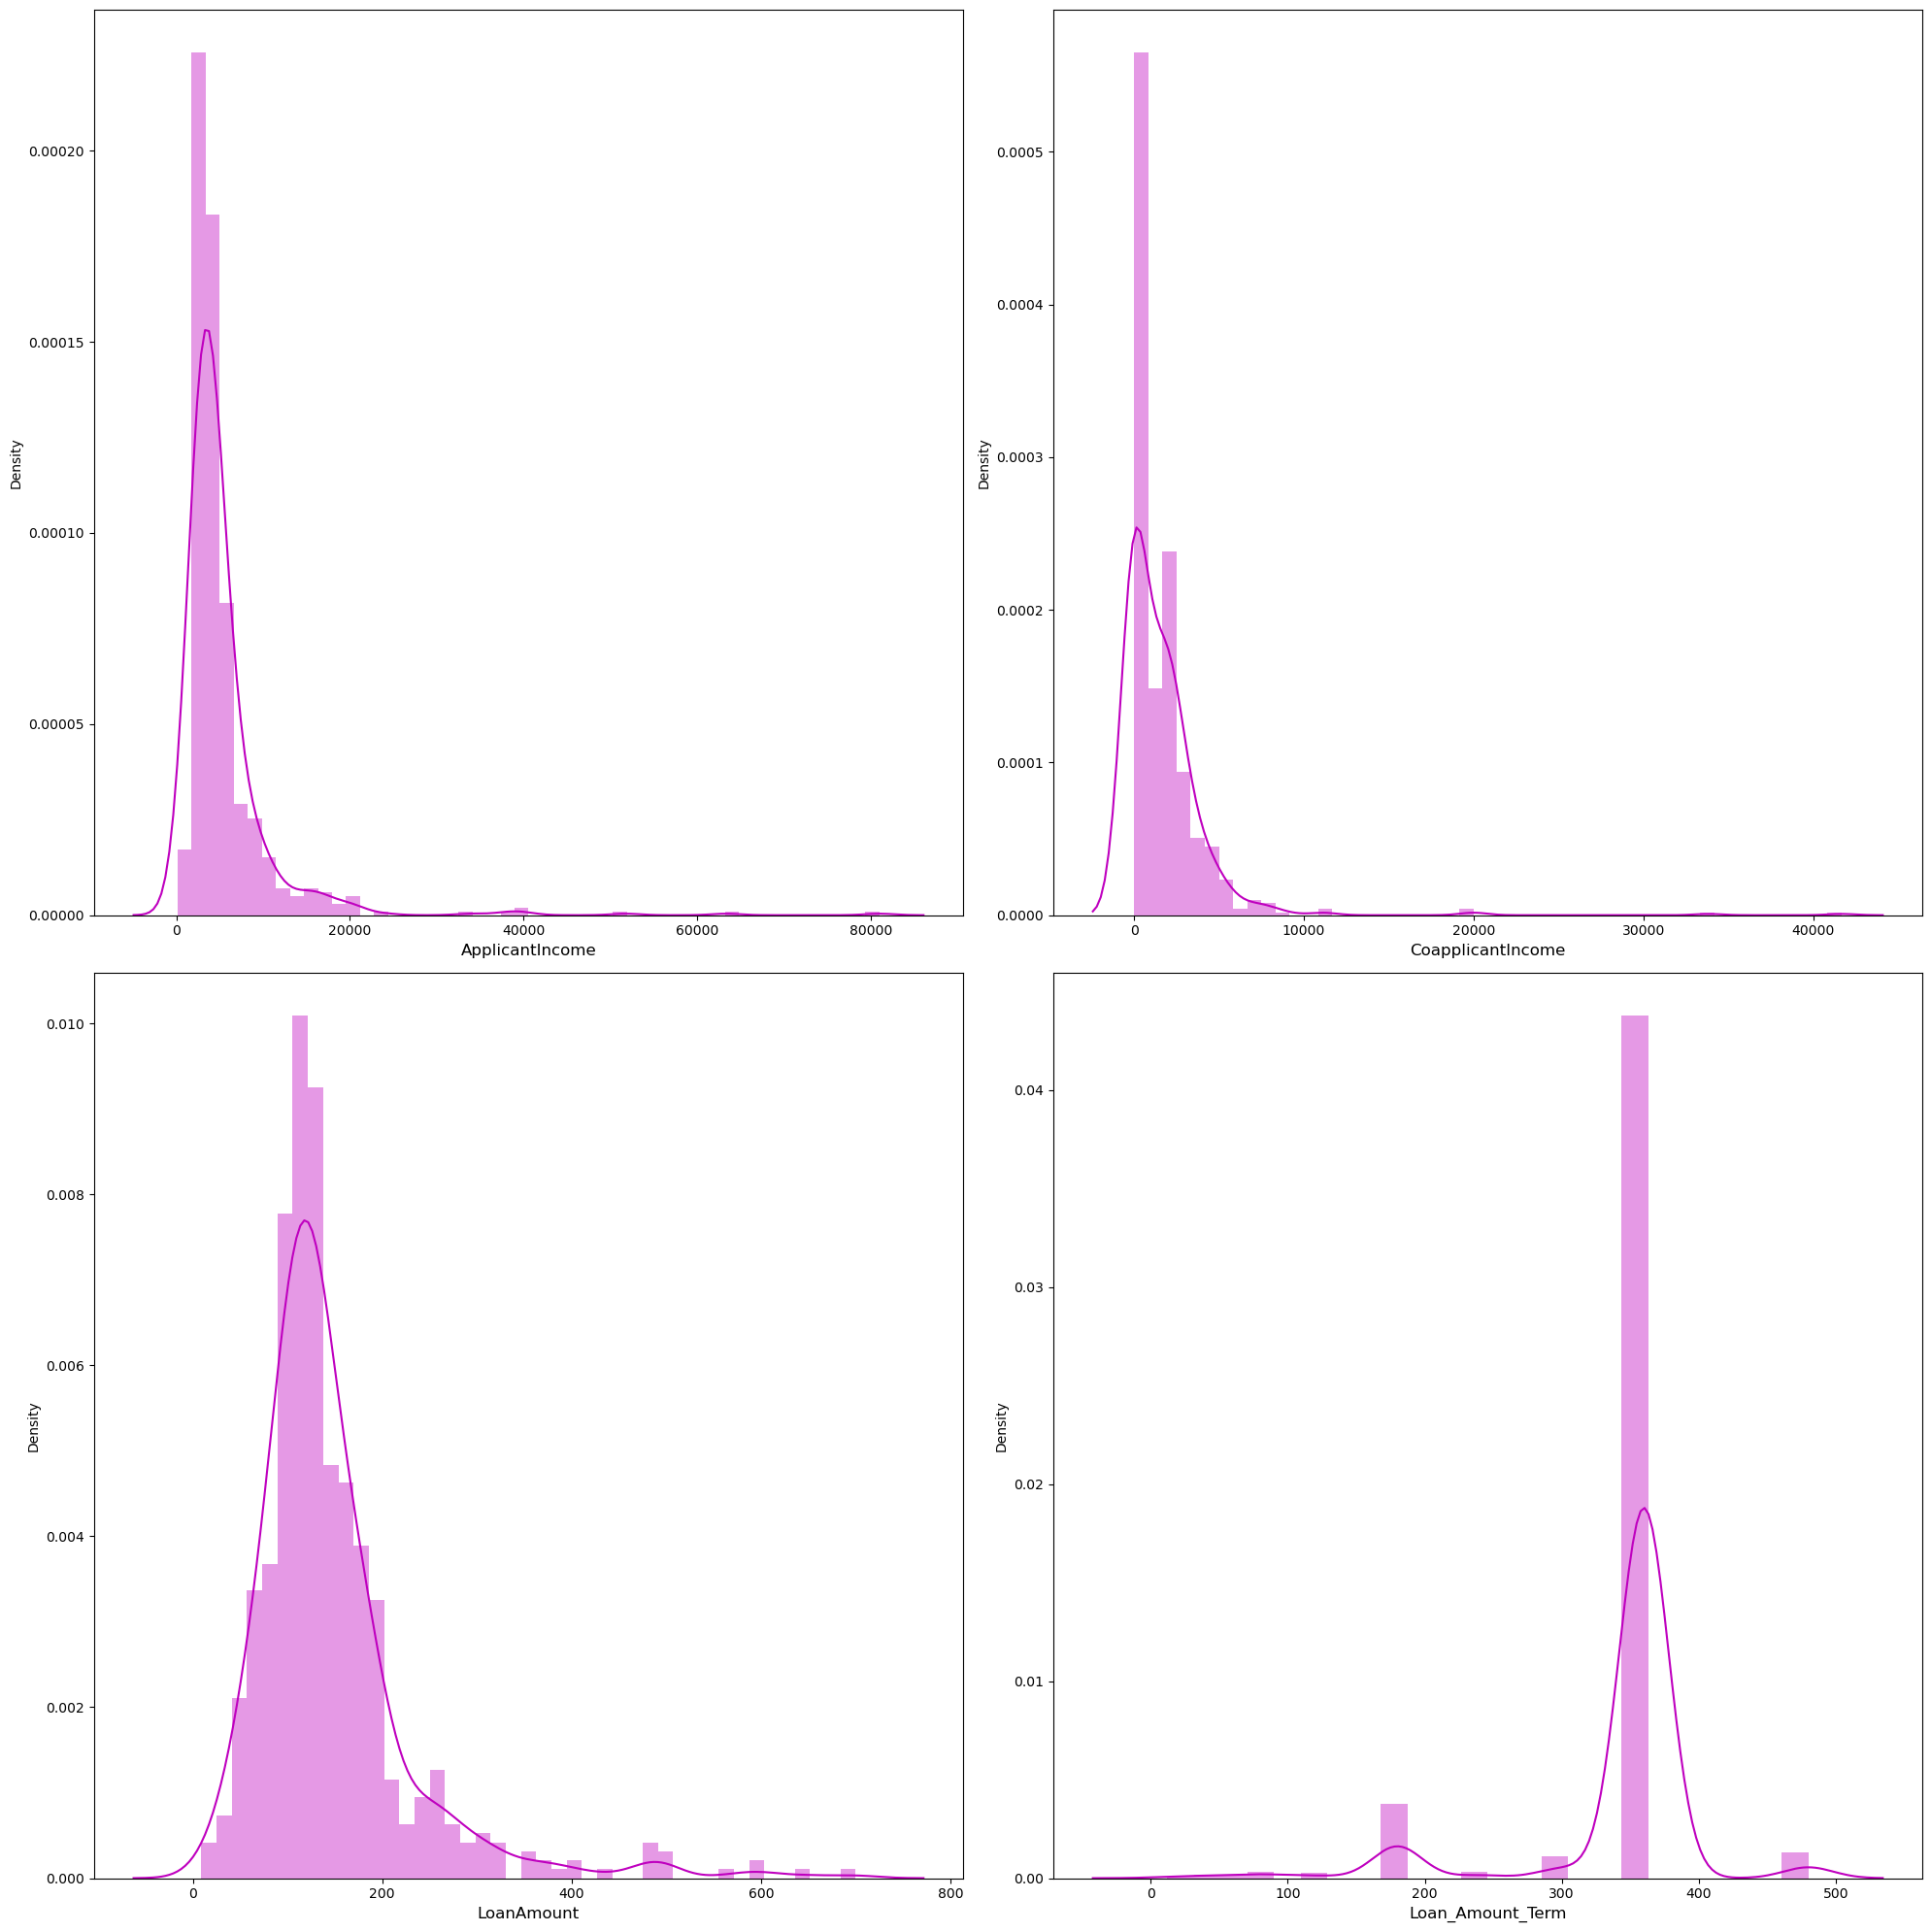

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20), facecolor="white")
plotnumber = 1
#numerical_columns = ['column1', 'column2', 'column3', 'column4']  # Replace with your actual numerical column names

for column in numerical_columns:
    if plotnumber <= 4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(data[column], color="m")
        plt.xlabel(column, fontsize=12)
        plt.yticks(rotation=0, fontsize=10)
        plotnumber += 1

plt.tight_layout()
plt.show()


loam amount ,applicant income and coapplicant income is skewed  to right

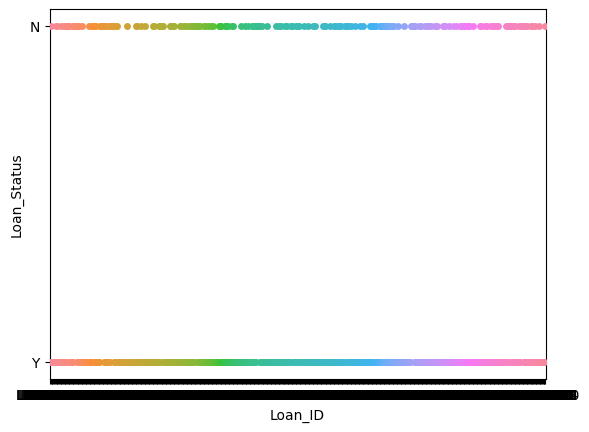

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.stripplot(x='Loan_ID', y='Loan_Status',data=data)
plt.show()

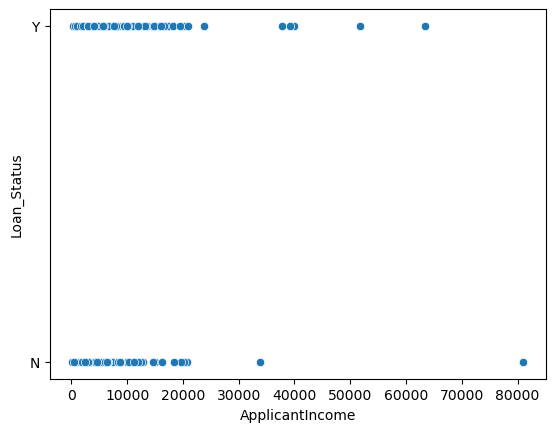

In [28]:
import matplotlib.pyplot as plt
sns.scatterplot(x='ApplicantIncome', y="Loan_Status",data=data)
plt.show()


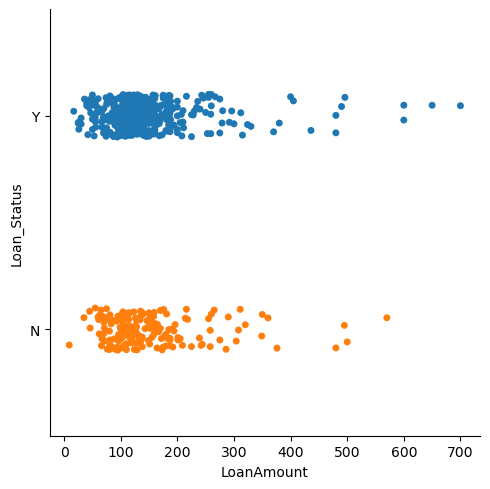

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='LoanAmount', y='Loan_Status', data=data)
plt.show()


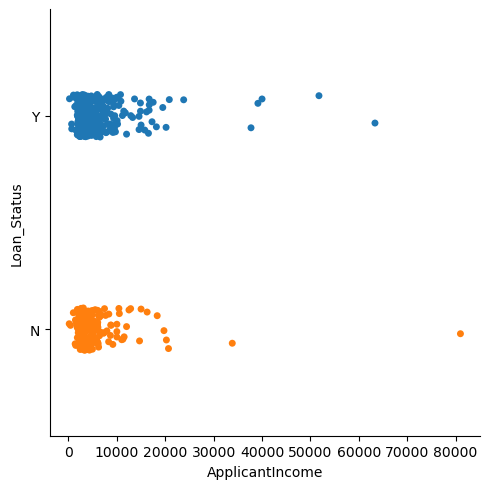

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='ApplicantIncome', y='Loan_Status',data=data)
plt.show()


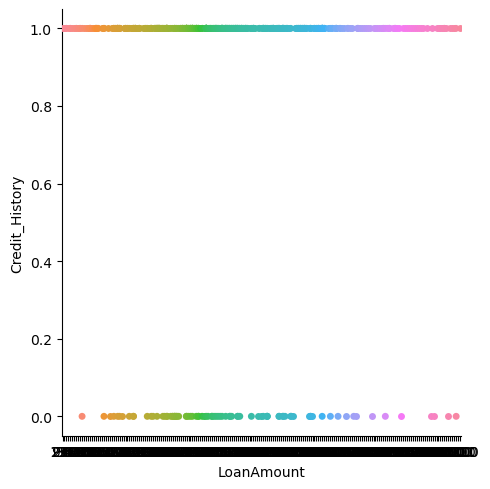

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x='LoanAmount', y='Credit_History', data=data)
plt.show()


In [ ]:
sns.catplot(x='Credit_History', y='Loan_Status', data=data)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\axisgrid.py:1278: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.hue_vals = pd.Series(["_nolegend_"] * len(data),


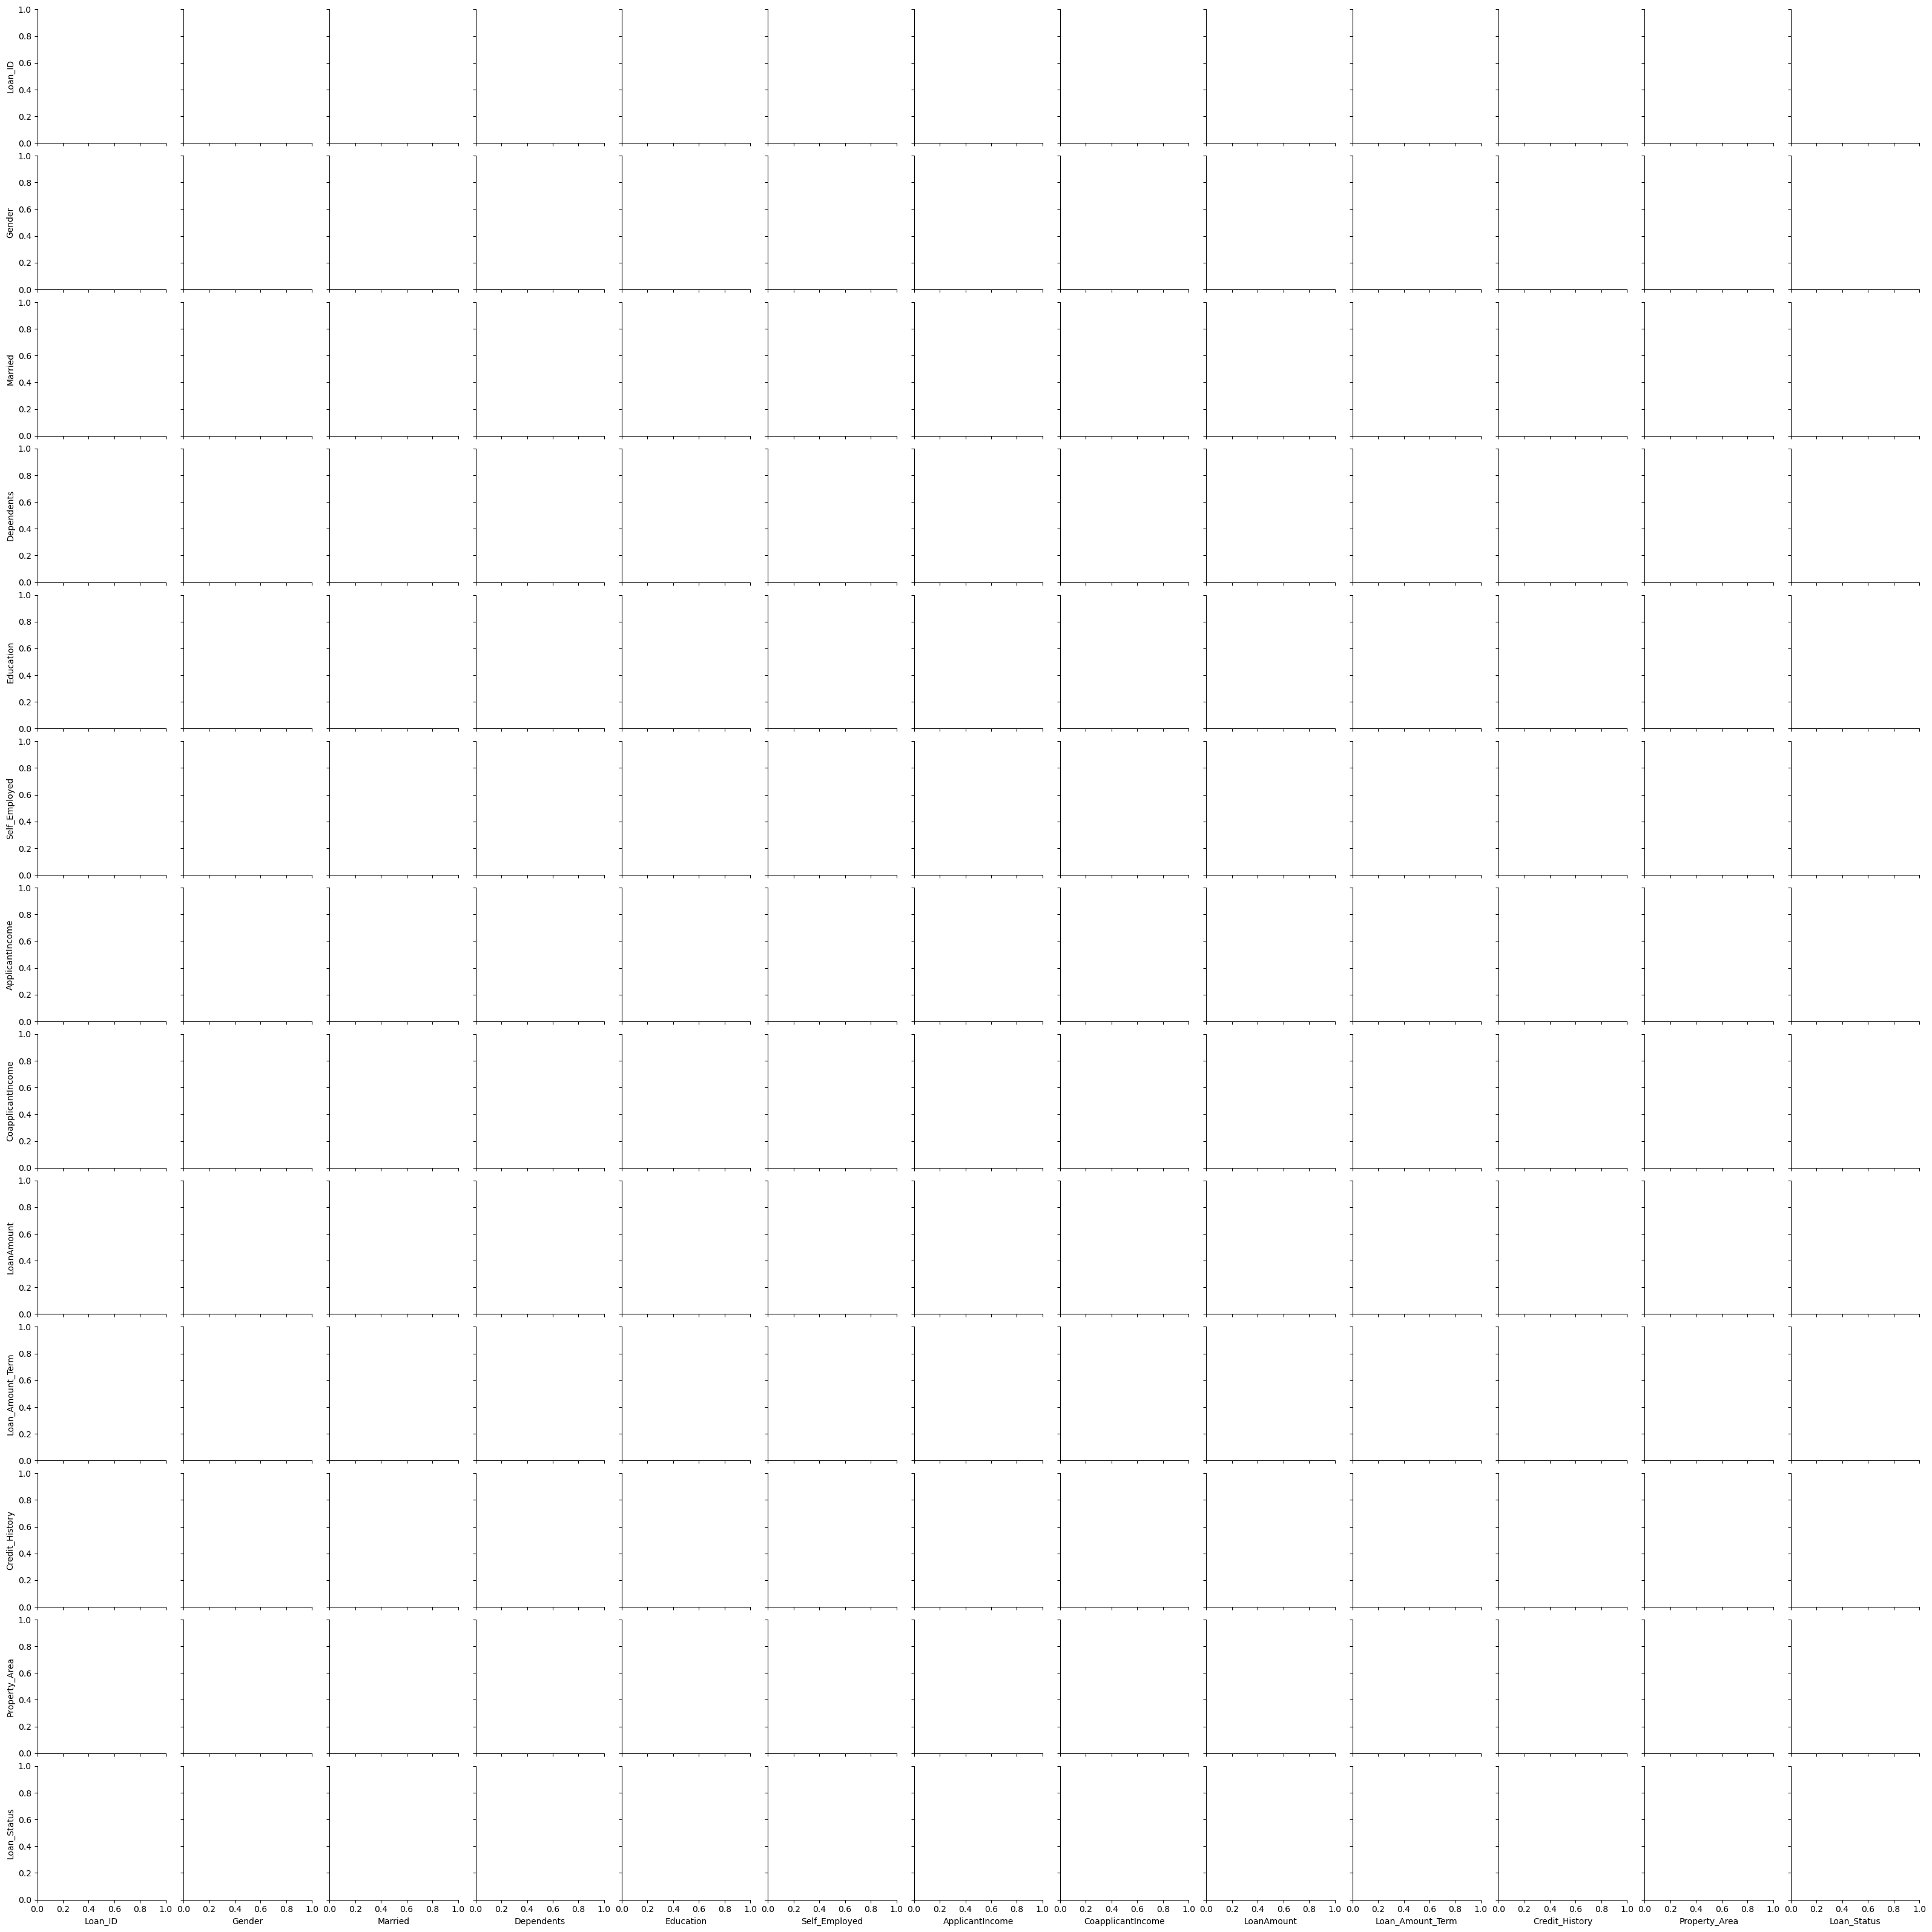

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the DataFrame based on the condition
subset = data[data['Loan_Status']== 'Yes']

# Create the pairplot
sns.pairplot(subset, palette='Dark2')

# Display the plot
plt.show()



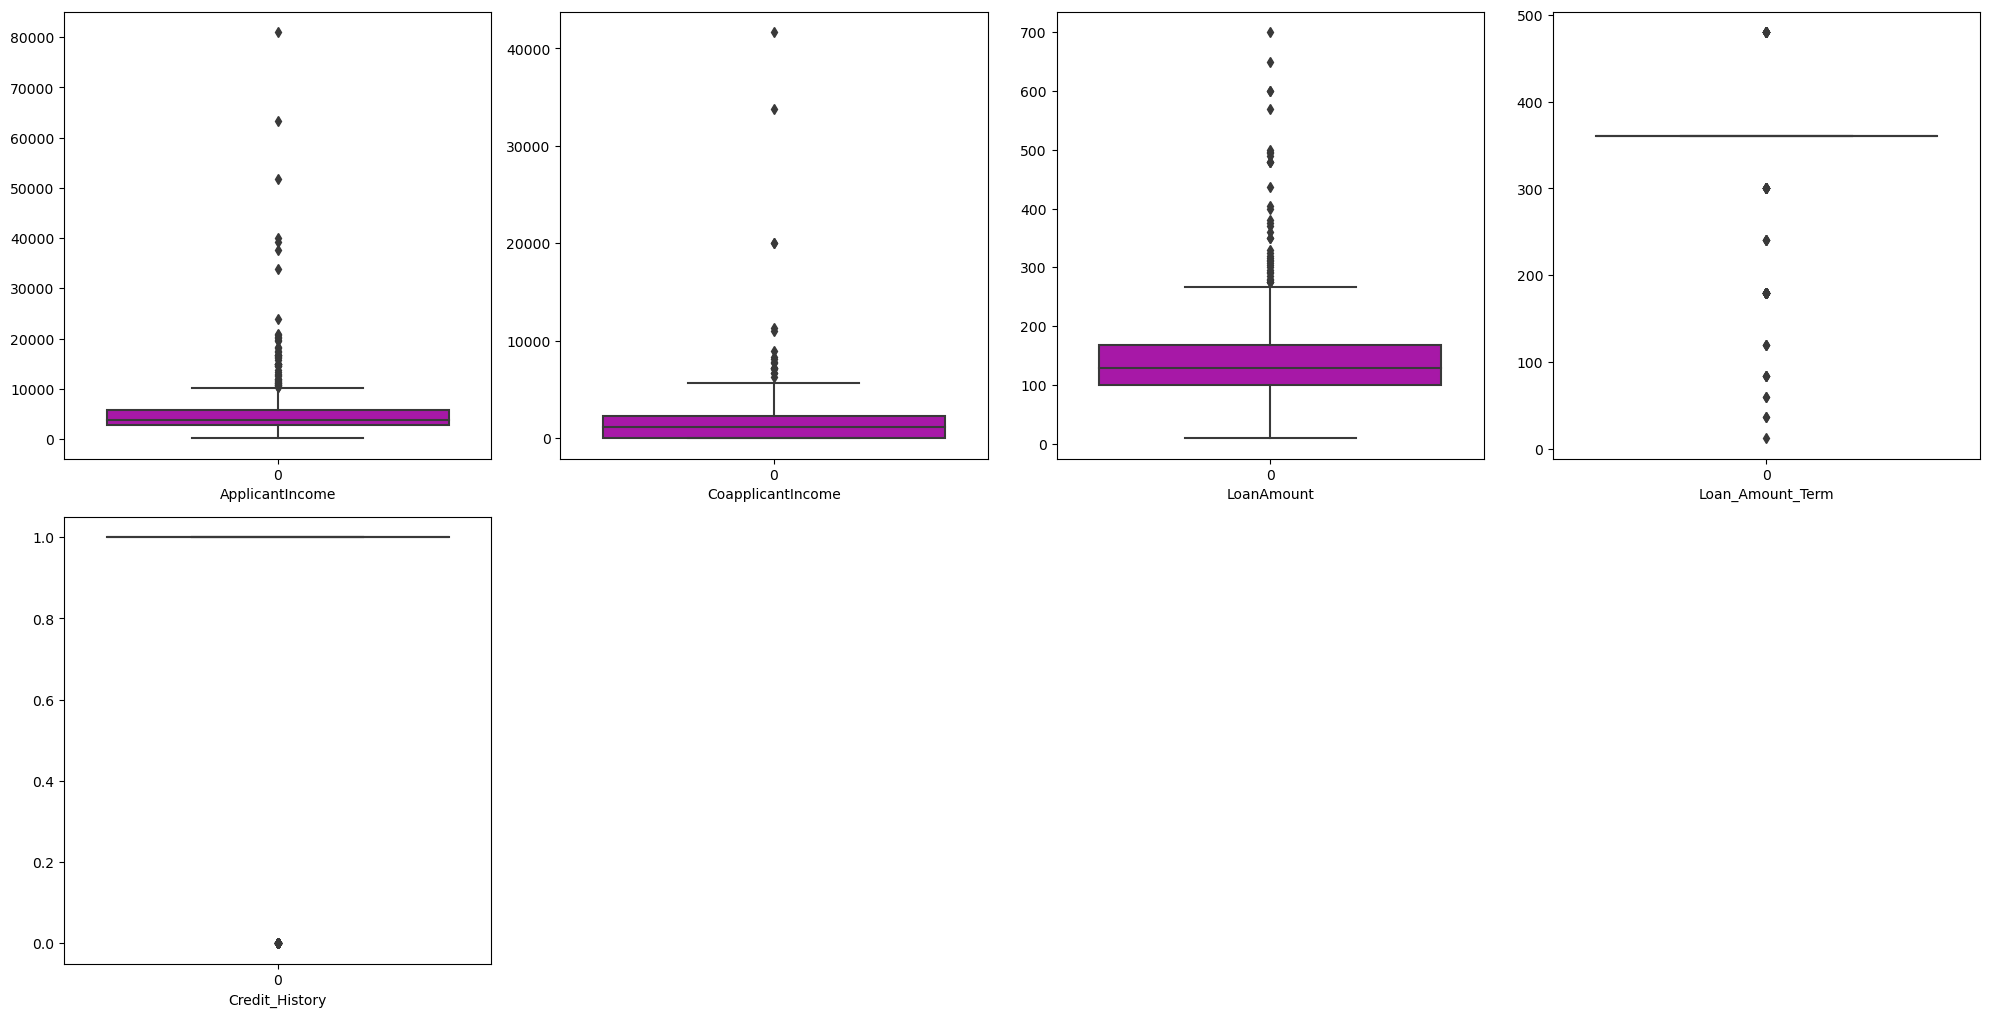

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 25))

p = 1
numeric_columns = data.select_dtypes(include=[np.number]).columns  # Select only numeric columns

for i in numeric_columns:
    if p <= 13:
        ax = plt.subplot(5, 4, p)
        sns.boxplot(data=data[i], color="m")
        plt.xlabel(i)
        p += 1

plt.tight_layout()
plt.show()


In [41]:
#data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)
#data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace=True)
#data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)



In [43]:
import numpy as np
from scipy.stats import zscore
data2=data1[['ApplicantIncome','CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']]
z=np.abs(zscore(out_feature))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.279851,0.451640
1,0.134412,0.038732,0.219273,0.279851,0.451640
2,0.393747,0.554487,0.957641,0.279851,0.451640
3,0.462062,0.251980,0.314547,0.279851,0.451640
4,0.097728,0.554487,0.064454,0.279851,0.451640
...,...,...,...,...,...
609,0.410130,0.554487,0.898095,0.279851,0.451640
610,0.212557,0.554487,1.267279,2.518655,0.451640
611,0.437174,0.472404,1.269371,0.279851,0.451640
612,0.357064,0.554487,0.483367,0.279851,0.451640


In [40]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [46]:
z.iloc[9,1]

3.196712546212882

In [50]:
#removing the data above z score and ceating new data frame
data2=data1[(z<3).all(axis=1)]
data2.shape


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7500\3095226167.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data2=data1[(z<3).all(axis=1)]


(577, 13)

In [52]:
data.skew()# -05 to +0.5

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7500\3786652358.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()# -05 to +0.5


ApplicantIncome      2.148522
CoapplicantIncome   -0.038951
LoanAmount           1.115399
Loan_Amount_Term    -2.060679
Credit_History      -1.843372
dtype: float64

ApplicantIncome      
CoapplicantIncome   
LoanAmount           
Loan_Amount_Term    
Credit_History       
have skewness

In [53]:
import numpy as np

data1['CoapplicantIncome'] = np.cbrt(data['CoapplicantIncome'])


In [54]:
data1.skew()# -05 to +0.5

Loan_ID              0.000000
Gender              -1.592567
Married             -0.621783
Dependents           1.012768
Education            1.306588
Self_Employed        2.164757
ApplicantIncome      2.148522
CoapplicantIncome   -0.228152
LoanAmount           1.115399
Loan_Amount_Term    -2.060679
Credit_History      -1.843372
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [35]:
import pandas as pd

delete = pd.DataFrame([["-0.004710","CoapplicantIncome","No","Alot"]],
                      columns=["Correlation with target","Column Name","Normalized","Outliers"])

print(delete)


  Correlation with target        Column Name Normalized Outliers
0                0.196726  CoapplicantIncome         No     Alot


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


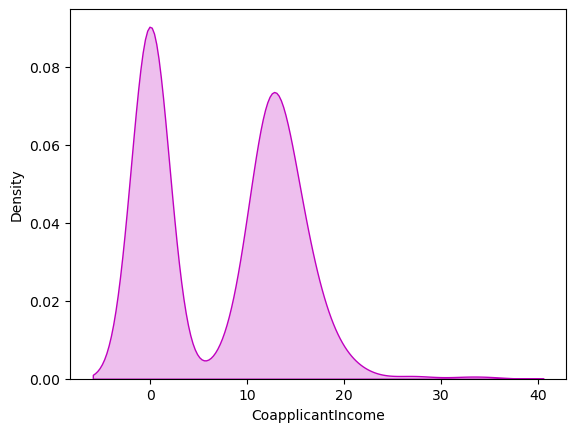

In [53]:
sns.distplot(data["CoapplicantIncome"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()


not normalized

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


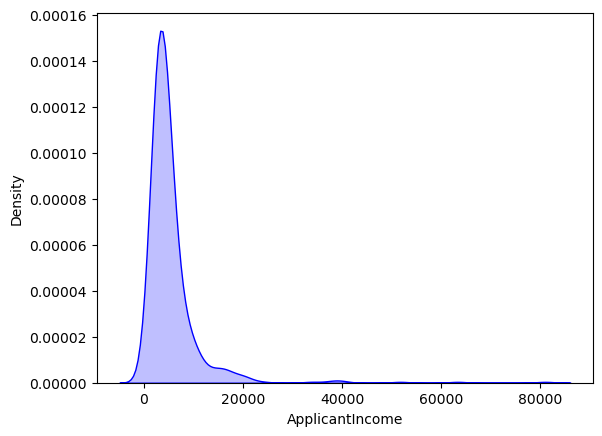

In [54]:
sns.distplot(data["ApplicantIncome"], color="b", kde_kws={"shade": True}, hist=False)
plt.show()

left skewed

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


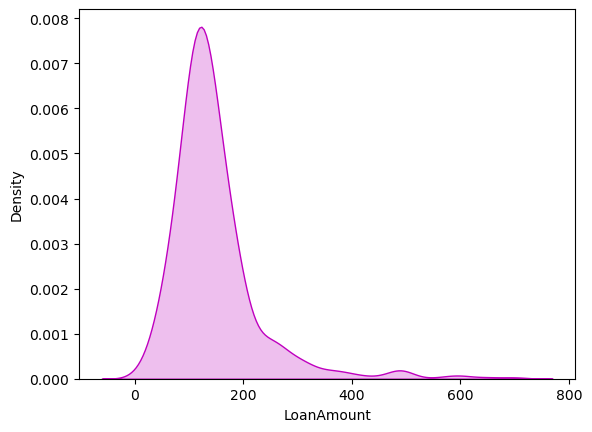

In [55]:
sns.distplot(data["LoanAmount"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


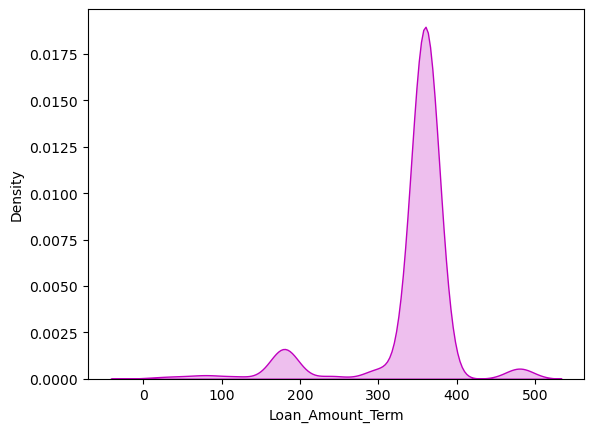

In [56]:
sns.distplot(data["Loan_Amount_Term"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

binomial distribution

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


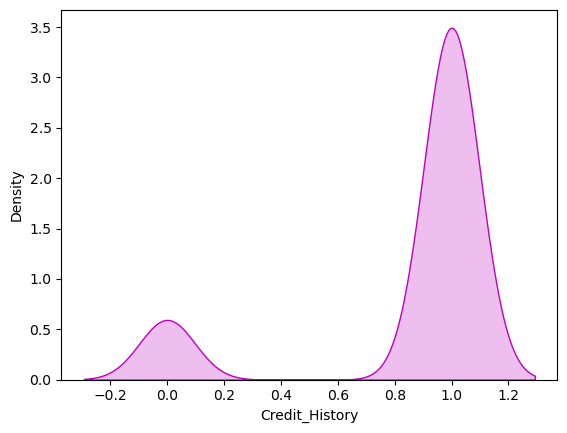

In [57]:
sns.distplot(data["Credit_History"], color="m", kde_kws={"shade": True}, hist=False)
plt.show()

bimonial data

Encoding Categorical Columns               
               



In [65]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in data1.columns:
    if data1[i].dtypes=="object":
        data1[i]=OE.fit_transform(data[i].values.reshape(-1,1))
data1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.000000,NaN,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,2.255048,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.000000,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2.369884,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.000000,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.000000,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.000000,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,1.838518,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.000000,187.0,360.0,1.0,2.0,1.0


In [57]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            577 non-null    float64
 1   Gender             566 non-null    float64
 2   Married            574 non-null    float64
 3   Dependents         562 non-null    float64
 4   Education          577 non-null    float64
 5   Self_Employed      548 non-null    float64
 6   ApplicantIncome    577 non-null    int64  
 7   CoapplicantIncome  577 non-null    float64
 8   LoanAmount         555 non-null    float64
 9   Loan_Amount_Term   563 non-null    float64
 10  Credit_History     532 non-null    float64
 11  Property_Area      577 non-null    float64
 12  Loan_Status        577 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 63.1 KB


In [58]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,577.000000,566.000000,574.000000,562.000000,577.000000,548.000000,577.000000,577.000000,555.000000,563.000000,532.000000,577.000000,577.000000
mean,288.000000,0.810954,0.648084,0.738434,0.227036,0.133212,4666.020797,1.324788,135.637838,347.744227,0.838346,1.031196,0.689775
std,166.709828,0.391891,0.477985,1.001380,0.419280,0.340114,2965.452652,1.173167,57.259719,52.452913,0.368480,0.789953,0.462987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,180.000000,0.000000,0.000000,0.000000
25%,144.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2833.000000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3750.000000,2.209499,126.000000,360.000000,1.000000,1.000000,1.000000
75%,432.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5532.000000,2.357920,160.000000,360.000000,1.000000,2.000000,1.000000
max,576.000000,1.000000,1.000000,3.000000,1.000000,1.000000,20667.000000,2.749495,380.000000,480.000000,1.000000,2.000000,1.000000


CORRELATION BETWEEN TARGET VARIABLE AND INDEPENDENT VARIABLE

In [62]:
corr=data.corr()
corr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.032244,-0.015031,0.054261,0.039442,0.032175,0.016925,-0.013743,0.035684,-0.028945,-0.030603,-0.155416,0.011773
Gender,-0.032244,1.000000,0.369612,0.175970,0.049258,-0.009829,0.053989,0.211056,0.105462,-0.074134,0.011878,-0.024556,0.019857
Married,-0.015031,0.369612,1.000000,0.343417,0.014223,0.001909,0.051332,0.283247,0.146981,-0.102600,0.009481,0.002918,0.089280
Dependents,0.054261,0.175970,0.343417,1.000000,0.059161,0.057867,0.118679,-0.008289,0.161142,-0.099589,-0.051726,0.006828,0.006781
Education,0.039442,0.049258,0.014223,0.059161,1.000000,-0.012333,-0.140760,0.010615,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,0.032175,-0.009829,0.001909,0.057867,-0.012333,1.000000,0.140826,-0.074975,0.121649,-0.036624,0.005495,-0.031214,-0.002303
ApplicantIncome,0.016925,0.053989,0.051332,0.118679,-0.140760,0.140826,1.000000,-0.229695,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,-0.013743,0.211056,0.283247,-0.008289,0.010615,-0.074975,-0.229695,1.000000,0.103990,-0.003778,0.005038,-0.052318,0.033582
LoanAmount,0.035684,0.105462,0.146981,0.161142,-0.166998,0.121649,0.565620,0.103990,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.074134,-0.102600,-0.099589,-0.077242,-0.036624,-0.045242,-0.003778,0.038801,1.000000,0.000432,-0.077620,-0.020974


In [ ]:
credit history has 54% corelattion with loan status 

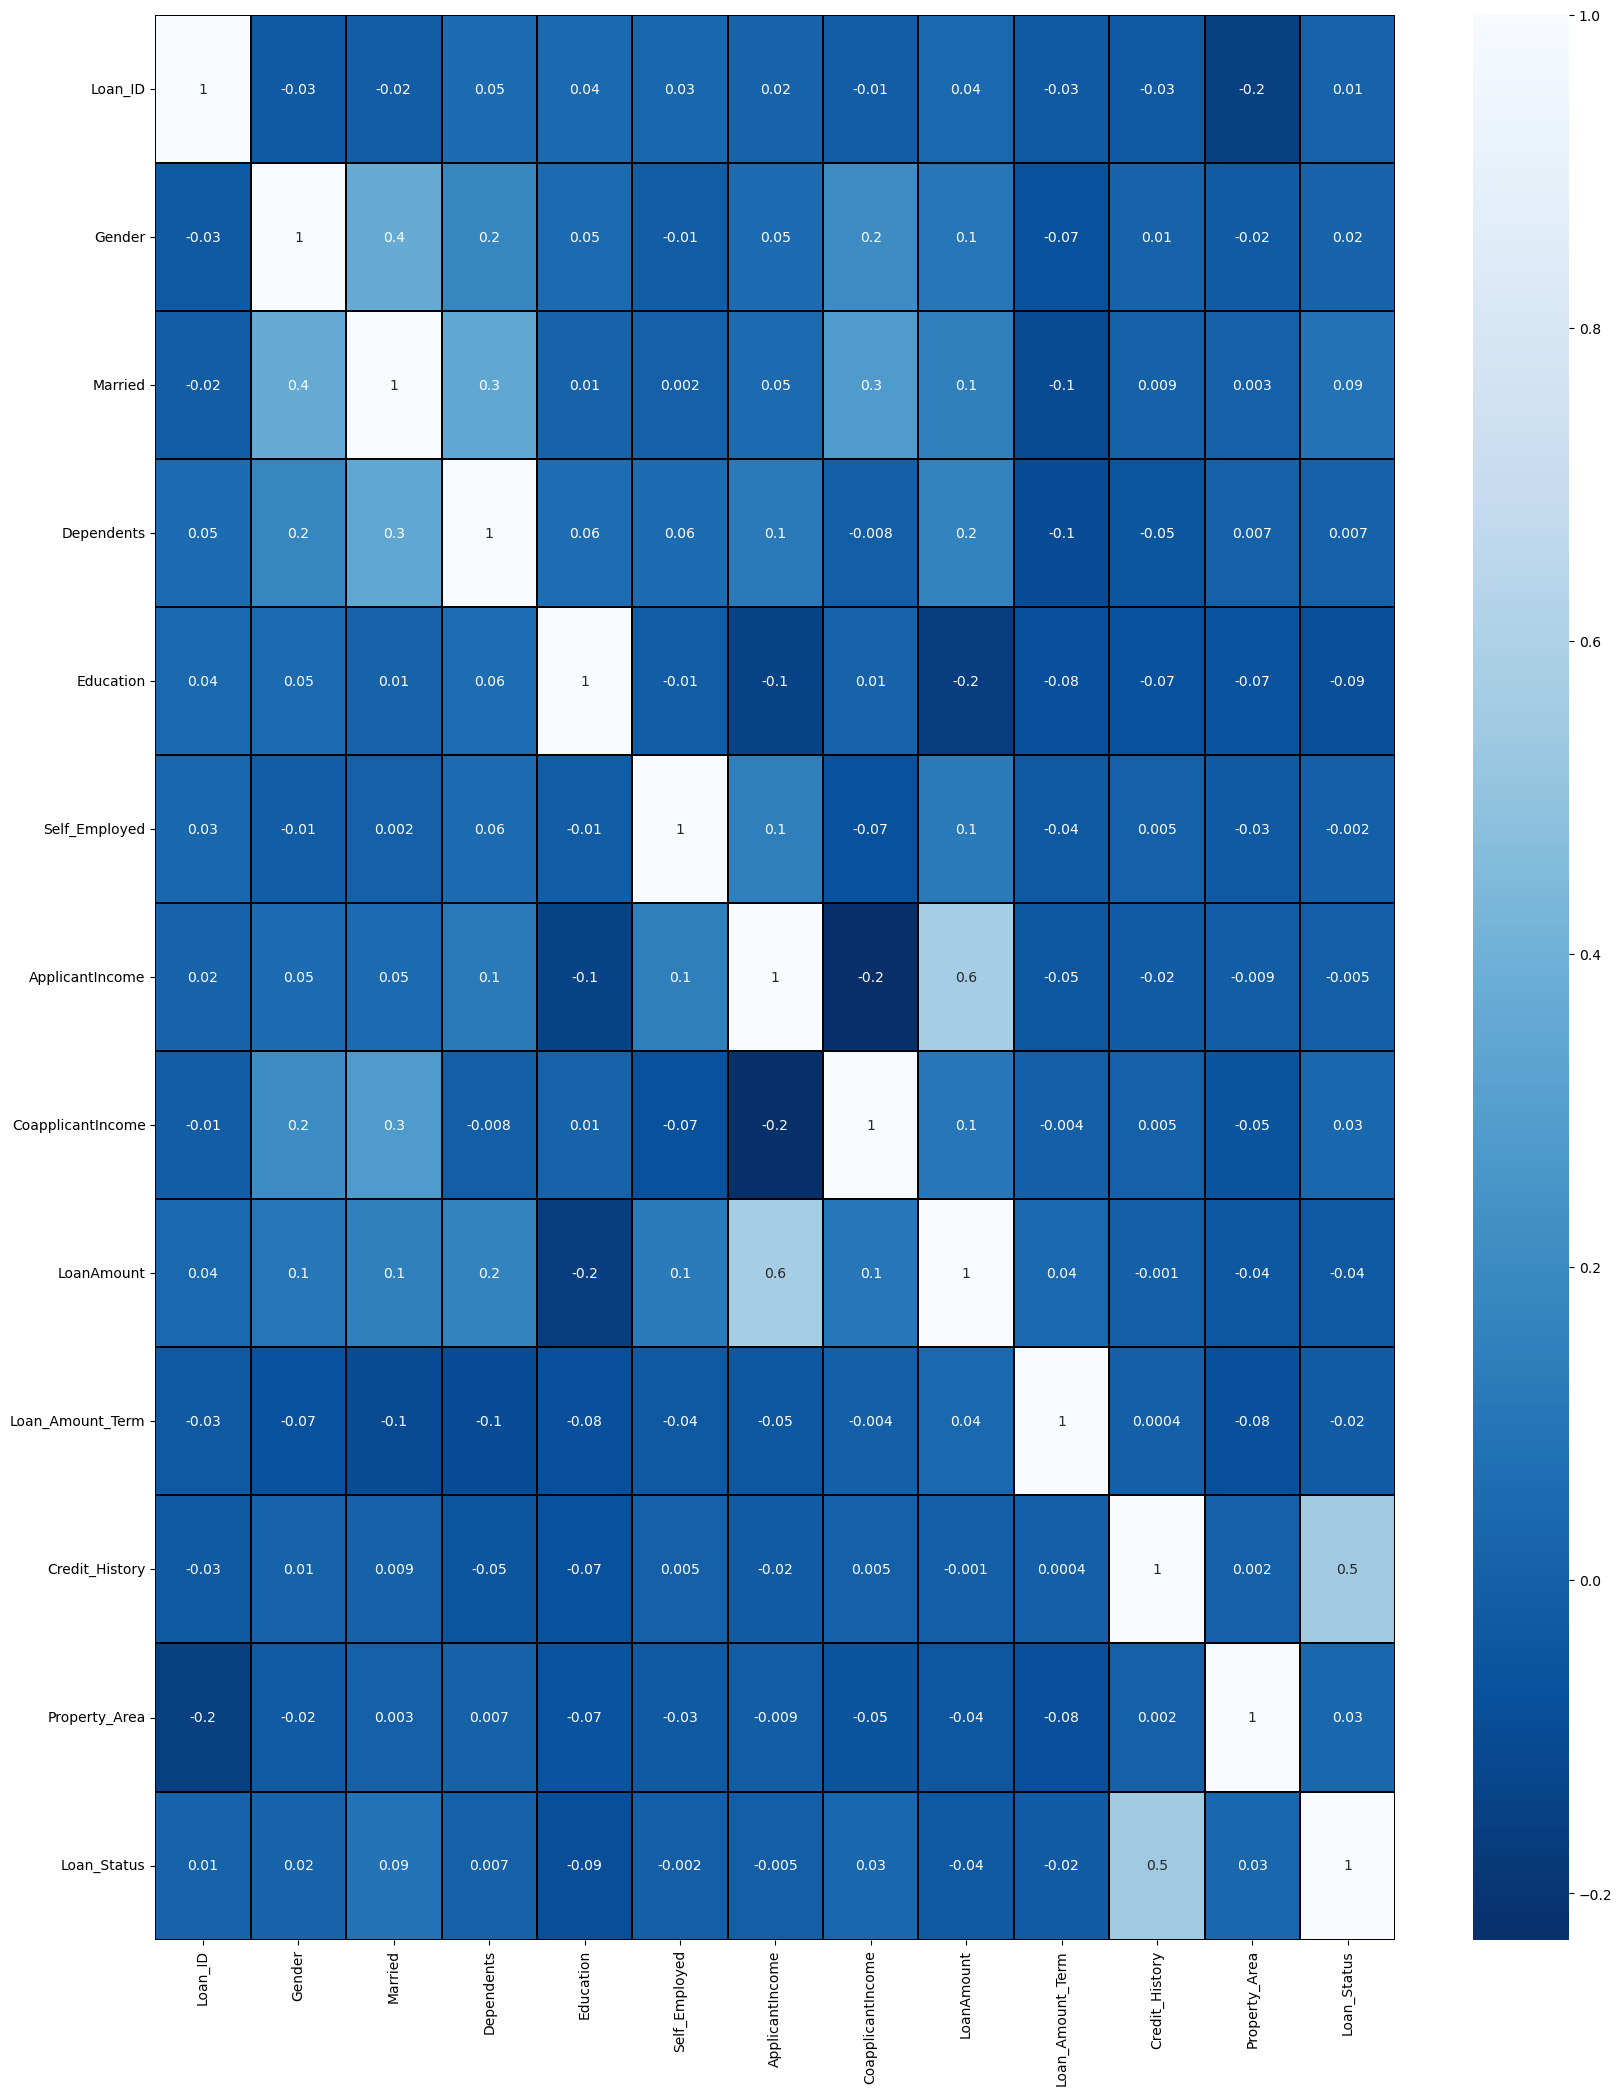

In [63]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(),linewidth=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

HEAT MAP CONSISTS OF BOTH POSITIVE AND NEGATIVE CORELATION. credit history  54 % POSITIVE CORELATION WITH TARGET. 

In [64]:
corr["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.089280
CoapplicantIncome    0.033582
Property_Area        0.032112
Gender               0.019857
Loan_ID              0.011773
Dependents           0.006781
Self_Employed       -0.002303
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
Education           -0.085884
Name: Loan_Status, dtype: float64

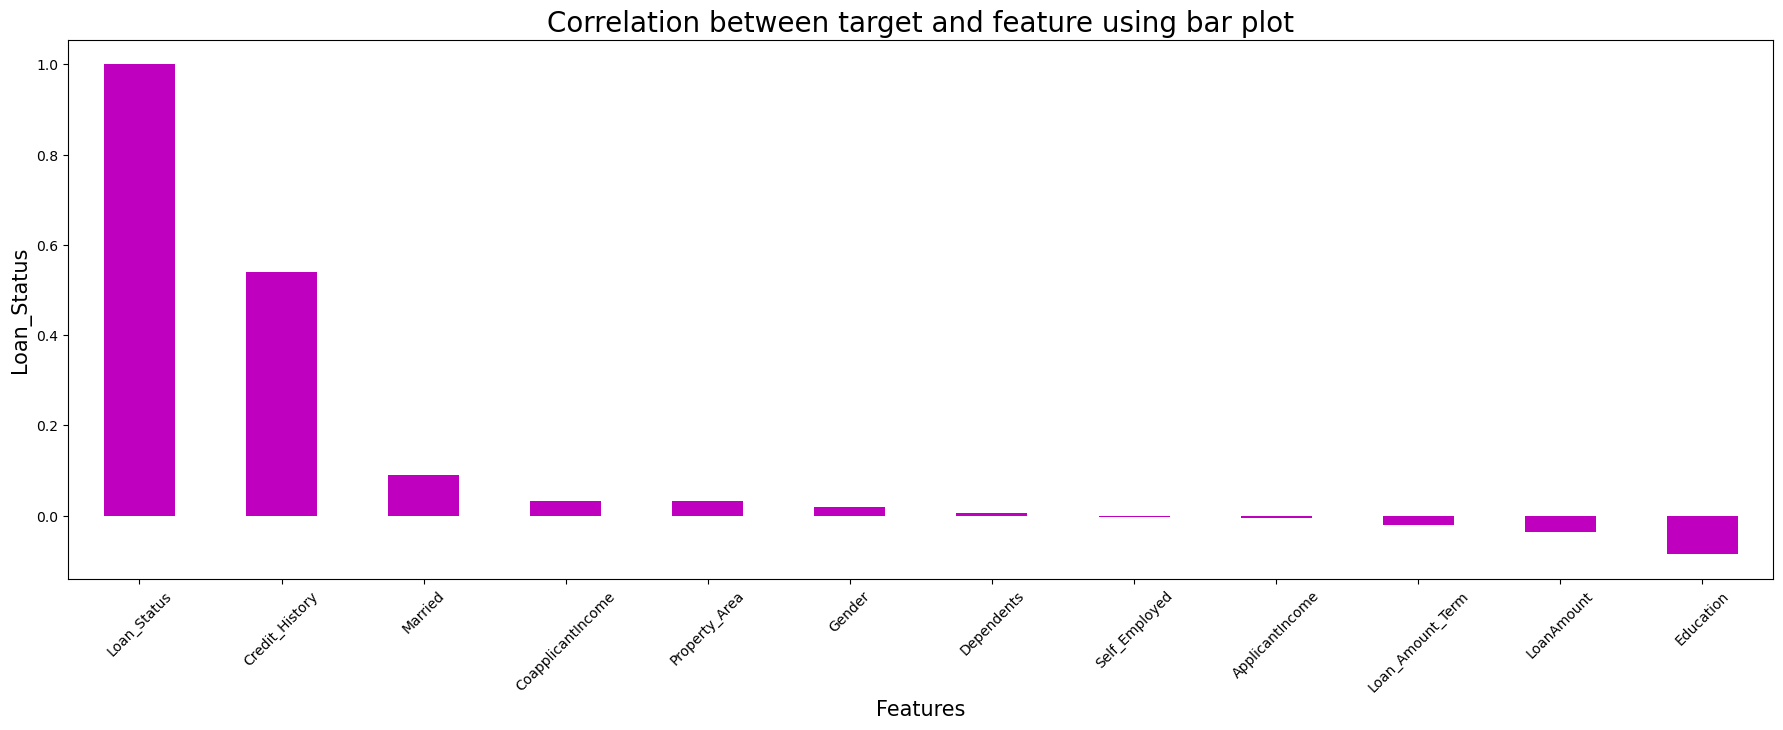

In [67]:
plt.figure(figsize=(22,7), facecolor="white")
data.corr()["Loan_Status"].sort_values(ascending=False).drop(["Loan_ID"]).plot(kind="bar",color="m")
plt.xlabel("Features", fontsize=15)  # Set a single x-label for all features
plt.ylabel("Loan_Status", fontsize=15)
plt.title("Correlation between target and feature using bar plot", fontsize=20)
plt.xticks(rotation=45)  # Rotate x-labels if needed
plt.show()


Seprating featires and labels

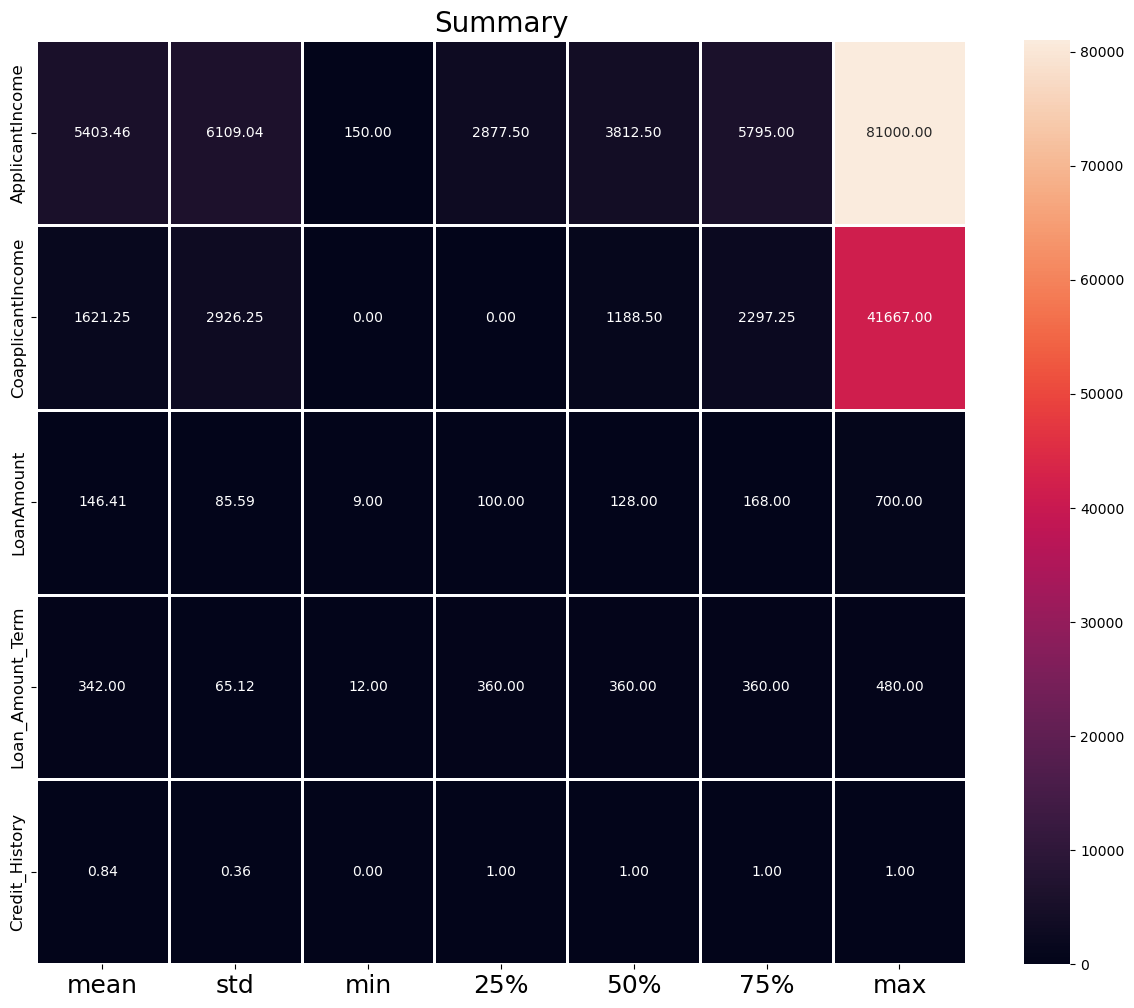

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(data.describe()[1:].transpose(), linewidths=2, annot=True, fmt=".2f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Summary", fontsize=20)

plt.show()


In [59]:
x=data.drop("Loan_Status",axis=1)
y=data["Loan_Status"]

In [89]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your data into the variable `x`
x = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

# Select only the numeric columns
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Apply StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_numeric)

print(x_scaled)



[[ 0.07299082 -0.55448733         nan  0.27664167  0.43286074]
 [-0.13441195 -0.03873155 -0.21530913  0.27664167  0.43286074]
 [-0.39374734 -0.55448733 -0.94032807  0.27664167  0.43286074]
 ...
 [ 0.43717437 -0.47240418  1.24642259  0.27664167  0.43286074]
 [ 0.35706382 -0.55448733  0.47462824  0.27664167  0.43286074]
 [-0.13441195 -0.55448733 -0.15683986  0.27664167 -2.31021182]]


CHECKING VARIANCE INFLATION(VIF)

In [97]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Handle missing values
x_numeric = x_numeric.replace([np.inf, -np.inf], np.nan)
x_numeric = x_numeric.dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = x_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

# Print VIF data
print(vif_data)




             Feature       VIF
0    ApplicantIncome  2.784306
1  CoapplicantIncome  1.506459
2         LoanAmount  6.341153
3   Loan_Amount_Term  7.778582
4     Credit_History  5.687660


years with the company has highest VIF Terefore it is dropped first

In [98]:
# dropping date column
x.drop("Loan_Amount_Term",axis=1,inplace=True)

In [99]:

import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Handle missing values
x_numeric = x_numeric.replace([np.inf, -np.inf], np.nan)
x_numeric = x_numeric.dropna()

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = x_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(x_numeric.values, i) for i in range(x_numeric.shape[1])]

# Print VIF data
print(vif_data)


             Feature       VIF
0    ApplicantIncome  2.784847
1  CoapplicantIncome  1.505636
2         LoanAmount  5.250060
3     Credit_History  2.765013


In [100]:
y.value_counts()

Y    398
N    179
Name: Loan_Status, dtype: int64

The data is not balanced since it is a classification problem

In [107]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Select only the numeric columns for VIF calculation
numeric_columns = x.select_dtypes(include=[float, int]).columns
x_numeric = x[numeric_columns]

# Handle missing values
x_numeric = x_numeric.replace([np.inf, -np.inf], np.nan)
x_numeric = x_numeric.dropna()

# Convert non-numeric values in x to numeric representation
x_numeric = x_numeric.apply(pd.to_numeric, errors='coerce')

# Convert non-numeric values in y to numeric representation using label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Ensure x and y have the same number of samples
min_samples = min(len(x_numeric), len(y_encoded))
x_numeric = x_numeric[:min_samples]
y_encoded = y_encoded[:min_samples]

# Apply SMOTE for oversampling
sm = SMOTE()
x_resampled, y_resampled = sm.fit_resample(x_numeric, y_encoded)





In [108]:
# Checking value count of target column
y.value_counts()

Y    398
N    179
Name: Loan_Status, dtype: int64

data is balanced

MODELLING

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Select the features (independent variables) and target (dependent variable)
x = data2.iloc[:, :-1]  # All columns except the last one
y = data2['Loan_Status']  # Target variable

# Perform data preprocessing
imputer = SimpleImputer(strategy='mean')
x = imputer.fit_transform(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

maxAcc = 0
maxRS = 0

for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    predict = RFR.predict(x_test)
    acc = accuracy_score(y_test, predict)
    
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i

print("Best Accuracy is", maxAcc, "on random state", maxRS)



Best Accuracy is 0.8793103448275862 on random state 39


In [112]:
# cREATING TRAIN TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

In [113]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeRegressor, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, roc_auc_score






In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

RFC = RandomForestClassifier()
RFC.fit(x_train, np.array(y_train))
pred_RFC = RFC.predict(x_test)
pred_train = RFC.predict(x_train)
print(accuracy_score(y_test, pred_RFC))
print(confusion_matrix(y_test, pred_RFC))



0.8735632183908046
[[ 32  18]
 [  4 120]]


In [77]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)

print(accuracy_score(y_test,pred_LR))
print(confusion_matrix(y_test,pred_LR))
print(classification_report(y_test,pred_LR))

0.15745079662605435
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  6  4  0]
 [ 0  0 38 ...  1  0  0]
 ...
 [ 0  0  0 ... 36  9  0]
 [ 0  0  0 ... 15 23  0]
 [ 0  0  1 ...  8  4  5]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       112
         1.0       0.00      0.00      0.00        88
         2.0       0.33      0.37      0.35       103
         3.0       0.00      0.00      0.00       105
         4.0       0.16      0.08      0.10       104
         5.0       0.07      0.33      0.12        96
         6.0       0.15      0.33      0.20        92
         7.0       0.06      0.01      0.02       111
         8.0       0.85      0.46      0.60       112
         9.0       0.12      0.41      0.19       111
        10.0       0.00      0.00      0.00        95
        11.0       0.15      0.02      0.03       106
        12.0       0.18      0.49      0.26        92
        13.0       0.34      0.32      0.33       103
        14.0 

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [115]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
pred_train=svc.predict(x_train)

print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.867816091954023
[[ 28  22]
 [  1 123]]
              precision    recall  f1-score   support

         0.0       0.97      0.56      0.71        50
         1.0       0.85      0.99      0.91       124

    accuracy                           0.87       174
   macro avg       0.91      0.78      0.81       174
weighted avg       0.88      0.87      0.86       174



In [116]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
pred_train=GB.predict(x_train)

print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.8505747126436781
[[ 31  19]
 [  7 117]]
              precision    recall  f1-score   support

         0.0       0.82      0.62      0.70        50
         1.0       0.86      0.94      0.90       124

    accuracy                           0.85       174
   macro avg       0.84      0.78      0.80       174
weighted avg       0.85      0.85      0.84       174



In [80]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
pred_train=ABC.predict(x_train)

print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
print(classification_report(y_test,pred_ABC))

0.048359887535145266
[[ 0  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0 51  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0 45  0 ...  0  0  0]
 [ 0 44  0 ...  0  0 24]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       112
         1.0       0.02      0.44      0.04        88
         2.0       0.00      0.00      0.00       103
         3.0       0.00      0.00      0.00       105
         4.0       0.19      0.19      0.19       104
         5.0       0.00      0.00      0.00        96
         6.0       0.00      0.00      0.00        92
         7.0       0.00      0.00      0.00       111
         8.0       0.00      0.00      0.00       112
         9.0       0.00      0.00      0.00       111
        10.0       0.03      0.48      0.06        95
        11.0       0.00      0.00      0.00       106
        12.0       0.04      0.14      0.06        92
        13.0       0.00      0.00      0.00       103
        14.0

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)
pred_train=BC.predict(x_train)

print(accuracy_score(y_test,pred_BC))
print(confusion_matrix(y_test,pred_BC))
print(classification_report(y_test,pred_BC))

0.7931034482758621
[[ 34  16]
 [ 20 104]]
              precision    recall  f1-score   support

         0.0       0.63      0.68      0.65        50
         1.0       0.87      0.84      0.85       124

    accuracy                           0.79       174
   macro avg       0.75      0.76      0.75       174
weighted avg       0.80      0.79      0.80       174



In [82]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_ET=ET.predict(x_test)
pred_train=ET.predict(x_train)

print(accuracy_score(y_test,pred_ET))
print(confusion_matrix(y_test,pred_ET))
print(classification_report(y_test,pred_ET))

0.9117150890346767
[[109   0   0 ...   0   0   0]
 [  0  80   0 ...   0   0   1]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ...  53   0   0]
 [  0   0   0 ...   1  73   0]
 [  0   0   0 ...   0   0  93]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96       112
         1.0       0.86      0.91      0.88        88
         2.0       0.96      0.97      0.97       103
         3.0       0.96      0.88      0.92       105
         4.0       0.94      0.99      0.97       104
         5.0       0.88      0.83      0.86        96
         6.0       1.00      0.98      0.99        92
         7.0       0.95      0.94      0.95       111
         8.0       0.97      0.96      0.97       112
         9.0       0.87      0.86      0.86       111
        10.0       0.83      0.82      0.83        95
        11.0       0.92      0.95      0.94       106
        12.0       0.93      0.93      0.93        92
        13.0       0.87      0.8

In [118]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_RFC)-score.mean())*100)

[0.70689655 0.77586207 0.79130435 0.83478261 0.8       ]
0.7817691154422789
difference between ACCURACY score and cross validation score is - 9.179410294852575


In [119]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_GB)-score.mean())*100)

[0.5862069  0.74137931 0.7826087  0.80869565 0.80869565]
0.7455172413793104
difference between ACCURACY score and cross validation score is - 10.50574712643677


In [120]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_svc)-score.mean())*100)

[0.81034483 0.78448276 0.7826087  0.85217391 0.82608696]
0.8111394302848576
difference between ACCURACY score and cross validation score is - 5.667666166916541


In [123]:
ABC=AdaBoostClassifier()
from sklearn.model_selection import cross_val_score
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)
pred_train=ABC.predict(x_train)

print(accuracy_score(y_test,pred_ABC))
print(confusion_matrix(y_test,pred_ABC))
print(classification_report(y_test,pred_ABC))

score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_ABC)-score.mean())*100)

0.8045977011494253
[[ 30  20]
 [ 14 110]]
              precision    recall  f1-score   support

         0.0       0.68      0.60      0.64        50
         1.0       0.85      0.89      0.87       124

    accuracy                           0.80       174
   macro avg       0.76      0.74      0.75       174
weighted avg       0.80      0.80      0.80       174

[0.32758621 0.76724138 0.77391304 0.83478261 0.82608696]
0.7059220389805098
difference between ACCURACY score and cross validation score is - 9.867566216891554


In [124]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print('difference between ACCURACY score and cross validation score is -',(accuracy_score(y_test,pred_BC)-score.mean())*100)

[0.63793103 0.71551724 0.7826087  0.7826087  0.76521739]
0.7367766116941529
difference between ACCURACY score and cross validation score is - 5.632683658170922


In [126]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
pred_ET=ET.predict(x_test)
pred_train=ET.predict(x_train)

print(accuracy_score(y_test,pred_ET))
print(confusion_matrix(y_test,pred_ET))
print(classification_report(y_test,pred_ET))
score6=cross_val_score(ET,x,y)
print(score6)
print(score6.mean())
print('difference between r2 score and cross validation score is -',(accuracy_score(y_test,pred_ET)-score6.mean())*100)

0.8218390804597702
[[ 32  18]
 [ 13 111]]
              precision    recall  f1-score   support

         0.0       0.71      0.64      0.67        50
         1.0       0.86      0.90      0.88       124

    accuracy                           0.82       174
   macro avg       0.79      0.77      0.78       174
weighted avg       0.82      0.82      0.82       174

[0.77586207 0.76724138 0.7826087  0.83478261 0.7826087 ]
0.7886206896551724
difference between r2 score and cross validation score is - 3.3218390804597764


HYPER PARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV


parameters = {
    'criterion': ['gini','entropy'],
    'random_state': [10,50,1000],
    'max_depth': [0,10,20],
    'n_jobs': [-2,-1,1],
    'n_estimators': [50, 100, 200, 300]
}

gscv = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)
gscv.fit(x_train, y_train)

In [ ]:
best_params = gscv.best_params_
print(best_params)


In [161]:
Final_model = ExtraTreesClassifier(criterion='entropy', max_depth=20, n_estimators=200, n_jobs=-2, random_state=10)


In [164]:
from sklearn.metrics import accuracy_score

Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc * 100)


100.0


PLOTTING ROC AND COMPARE AUC FOR MODELS

In [165]:
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


TypeError: predict_proba() missing 1 required positional argument: 'X'

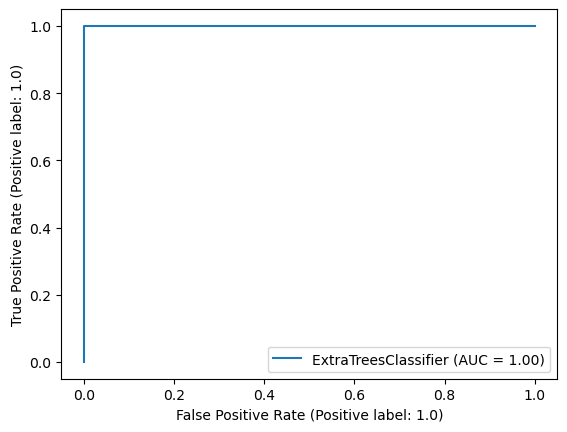

In [167]:
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

disp = plot_roc_curve(Final_model, x_test, y_test)
plot_roc_curve(RandomForestClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(LogisticRegression, x_test, y_test, ax=disp.ax_)
plot_roc_curve(SVC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GradientBoostingClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(AdaBoostClassifier, x_test, y_test, ax=disp.ax_)
plot_roc_curve(BaggingClassifier, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size': 11}, loc='lower right')
plt.show()


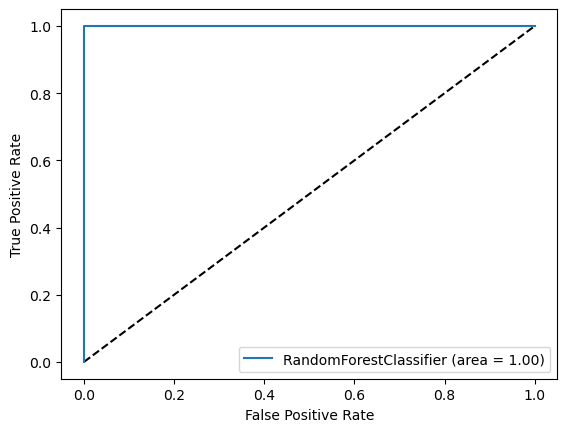

In [170]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = Final_model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr, tpr, label='RandomForestClassifier (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [172]:
import joblib

joblib.dump(Final_model, 'Attrition.pkl')

model = joblib.load('Attrition.pkl')

# Prediction
prediction = model.predict(x_test)
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted'] = prediction
data['Original'] = a

